In [1]:
import datetime as dt
import matplotlib as mp
import numpy as np
from data_wrangling import *
from analytics import *
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
pd.set_option('display.max_columns', 150)
# documentation: https://support.google.com/analytics/answer/3437719?hl=en

In [2]:
%%time
trainCSV = pd.read_csv('train_v2_flat.csv', sep=',', encoding='utf-8', low_memory=False).drop(columns=['trafficSource_campaignCode'])
trainCSV = fill_empty_values(trainCSV)

#testCSV  = pd.read_csv('test_v2_flat.csv', sep=',', encoding='utf-8', low_memory=False)
#testCSV = fill_empty_values(testCSV)

CPU times: user 48.4 s, sys: 4.12 s, total: 52.5 s
Wall time: 52.8 s


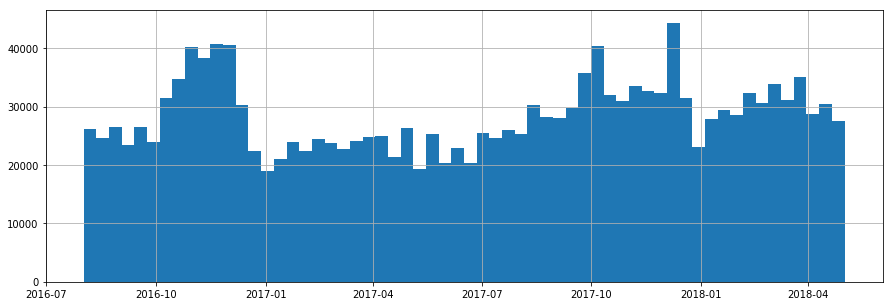

In [3]:
trainCSV.date.hist(bins = 60, figsize=(15,5))

In [4]:
train_1 = get_training_data(trainCSV , first_train_day = dt.datetime(2016, 8, 1))
train_2 = get_training_data(trainCSV , first_train_day = dt.datetime(2016,12, 1))
train_3 = get_training_data(trainCSV , first_train_day = dt.datetime(2017, 3, 1))
train_4 = get_training_data(trainCSV , first_train_day = dt.datetime(2017, 8, 1))
train = pd.concat([train_1, train_2, train_3,  train_4], ignore_index=True)

In [5]:
train.head()

,channelGrouping,device_browser,device_deviceCategory,device_isMobile,device_operatingSystem,geoNetwork_city,geoNetwork_continent,geoNetwork_country,geoNetwork_metro,geoNetwork_networkDomain,geoNetwork_region,geoNetwork_subContinent,totals_bounces,totals_newVisits,trafficSource_adContent,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adwordsClickInfo.slot,trafficSource_campaign,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source,visitNumber_last_1_months,totals_hits_last_1_months,totals_pageviews_last_1_months,totals_sessionQualityDim_last_1_months,totals_timeOnSite_last_1_months,totals_totalTransactionRevenue_last_1_months,totals_transactionRevenue_last_1_months,totals_transactions_last_1_months,trafficSource_adwordsClickInfo.page_last_1_months,visitNumber_last_2_months,totals_hits_last_2_months,totals_pageviews_last_2_months,totals_sessionQualityDim_last_2_months,totals_timeOnSite_last_2_months,totals_totalTransactionRevenue_last_2_months,totals_transactionRevenue_last_2_months,totals_transactions_last_2_months,trafficSource_adwordsClickInfo.page_last_2_months,visitNumber_last_3_months,totals_hits_last_3_months,totals_pageviews_last_3_months,totals_sessionQualityDim_last_3_months,totals_timeOnSite_last_3_months,totals_totalTransactionRevenue_last_3_months,totals_transactionRevenue_last_3_months,totals_transactions_last_3_months,trafficSource_adwordsClickInfo.page_last_3_months,visitNumber_last_6_months,totals_hits_last_6_months,totals_pageviews_last_6_months,totals_sessionQualityDim_last_6_months,totals_timeOnSite_last_6_months,totals_totalTransactionRevenue_last_6_months,totals_transactionRevenue_last_6_months,totals_transactions_last_6_months,trafficSource_adwordsClickInfo.page_last_6_months,visitNumber_2_months_ago,totals_hits_2_months_ago,totals_pageviews_2_months_ago,totals_sessionQualityDim_2_months_ago,totals_timeOnSite_2_months_ago,totals_totalTransactionRevenue_2_months_ago,totals_transactionRevenue_2_months_ago,totals_transactions_2_months_ago,trafficSource_adwordsClickInfo.page_2_months_ago,visitNumber_3_months_ago,totals_hits_3_months_ago,totals_pageviews_3_months_ago,totals_sessionQualityDim_3_months_ago,totals_timeOnSite_3_months_ago,totals_totalTransactionRevenue_3_months_ago,totals_transactionRevenue_3_months_ago,totals_transactions_3_months_ago,trafficSource_adwordsClickInfo.page_3_months_ago,visitNumber_4_months_ago,totals_hits_4_months_ago,totals_pageviews_4_months_ago,totals_sessionQualityDim_4_months_ago,totals_timeOnSite_4_months_ago,totals_totalTransactionRevenue_4_months_ago,totals_transactionRevenue_4_months_ago,totals_transactions_4_months_ago,trafficSource_adwordsClickInfo.page_4_months_ago,target
0,Organic Search,Firefox,desktop,False,Windows,not available in demo dataset,Europe,Netherlands,not available in demo dataset,chello.nl,not available in demo dataset,Western Europe,1.0,1.0,nan,nan,nan,nan,nan,(not set),nan,(not provided),organic,nan,google,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Organic Search,Chrome,desktop,False,Windows,Buenos Aires,Americas,Argentina,(not set),phonevision.com.ar,Buenos Aires,South America,1.0,1.0,nan,nan,nan,nan,nan,(not set),nan,(not provided),organic,nan,google,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Organic Search,Chrome,desktop,False,Linux,Bengaluru,Asia,India,(not set),acttv.in,Karnataka,Southern Asia,1.0,1.0,nan,nan,nan,nan,nan,(not set),nan,(not provided),organic,nan,google,0.0,0.0

In [6]:
get_basic_info(train).sort_values(by=['dtype'])

,dtype,empty_values,mode,types,unique_elements
column_name,,,,,
totals_hits_last_3_months,float64,0,0,{<type 'float'>: 1360600},394
totals_pageviews_2_months_ago,float64,0,0,{<type 'float'>: 1360600},207
totals_hits_2_months_ago,float64,0,0,{<type 'float'>: 1360600},270
visitNumber_2_months_ago,float64,0,0,{<type 'float'>: 1360600},339
trafficSource_adwordsClickInfo.page_last_6_months,float64,0,0,{<type 'float'>: 1360600},41
totals_transactions_last_6_months,float64,0,0,{<type 'float'>: 1360600},21
totals_transactionRevenue_last_6_months,float64,0,0,{<type 'float'>: 1360600},6508
totals_totalTransactionRevenue_last_6_months,float64,0,0,{<type 'float'>: 1360600},7445
totals_timeOnSite_last_6_months,float64,0,0,{<type 'float'>: 1360600},6461


#### The following cells have some sanity checks of the way in which I did feature engineering
#### Will do more of this sanity checks in sanity_checks_data_wrangling.ipynb

In [7]:
print "size of train data set ", len(train)
print "number of non-zeros in the target !!! = ", len(train[train.target>0])

size of train data set  1360600
number of non-zeros in the target !!! =  503


In [8]:
## we now focus on the companies that have target>0 (so they spent money in the testing period)
## And plot the spent of those in the last month/last six months before the testing period
revenue = train[train.target>0][['target', 'totals_totalTransactionRevenue_last_1_months','totals_totalTransactionRevenue_last_6_months']]
revenue.totals_totalTransactionRevenue_last_1_months=revenue.totals_totalTransactionRevenue_last_1_months.apply(lambda x: np.log(x+1))
revenue.totals_totalTransactionRevenue_last_6_months=revenue.totals_totalTransactionRevenue_last_6_months.apply(lambda x: np.log(x+1))

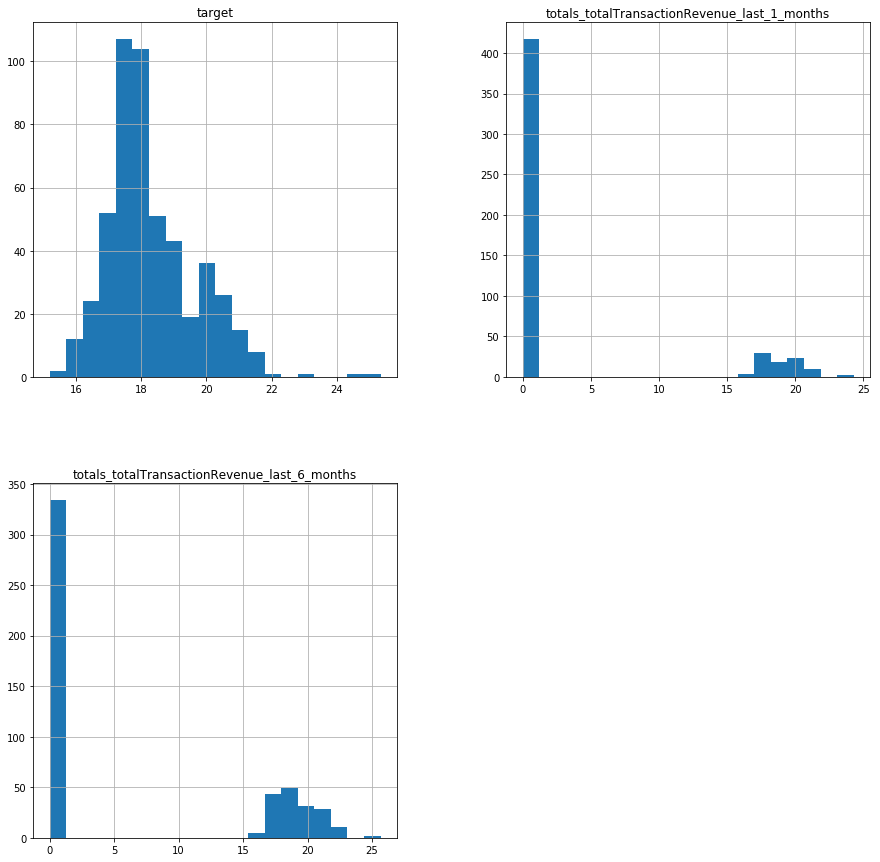

In [9]:
p = revenue.hist(bins=20, figsize=(15,15))

## Given that out of the 1.3M rows in the training data, only 500 have target different than zero, I starter playing with this problem as a classification, so binarized the target

In [10]:
X = train.drop(columns=['target'])
y = train.target.apply(lambda x: 1 if x>0 else 0) ## for now we just put a binary target

In [11]:
X = label_encode_object_dtypes(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [ ]:
clf = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'min_samples_leaf' : [10, 40], # Best:
    'max_depth': [None, 30, 200], # Best:
    'n_estimators': [50, 200] # Best:      
}

search = GridSearchCV(clf, param_grid, scoring="average_precision")
search.fit(X_train, y_train)

y_predicted_probability = search.predict_proba(X_test)[:,1]
plot_roc_curve(y_test, y_predicted_probability, title="ROC in test set RF")
plot_precision_recall_curve(y_test, y_predicted_probability)

all_features =pd.DataFrame({'feature': X_train.columns, 'importance': search.best_estimator_.feature_importances_})
all_features = all_features.sort_values(by=['importance'], ascending=False).set_index('feature')
all_features[all_features.importance>0].plot.bar()

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

In [ ]:
clf = XGBClassifier()
param_grid = {
    'max_depth':[8],    
    'n_estimators': [50], 
    'learning_rate' : [0.1], 
    'min_child_weight' : [100], 
    'reg_lambda': [30] 
}

search = GridSearchCV(clf, param_grid, scoring="average_precision")
search.fit(X_train, y_train)

y_predicted_probability = search.predict_proba(X_test)[:,1]
plot_roc_curve(y_test, y_predicted_probability, title="ROC in test set RF")
plot_precision_recall_curve(y_test, y_predicted_probability)

all_features =pd.DataFrame({'feature': X_train.columns, 'importance': search.best_estimator_.feature_importances_})
all_features = all_features.sort_values(by=['importance'], ascending=False).set_index('feature')
all_features[all_features.importance>0].plot.bar()

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)